In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

In [92]:
movies_df = df = pd.read_csv('moviesdata/movies_metadata.csv')
ratings_df = pd.read_csv('moviesdata/ratings.csv')


/var/folders/qk/32gcb2693kb2vvhwyf7jmtn40000gn/T/ipykernel_81805/2287946601.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = df = pd.read_csv('moviesdata/movies_metadata.csv')


In [93]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [94]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


# Data Cleaning for Hypothesis Test 1

#### Pearson correlation test: This tested whether there was a correlation between a movie's budget and it's average movie rating.

In [95]:
print("Budget Type:", movies_df['budget'].dtype)
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
print("Budget Type:", movies_df['budget'].dtype)
print("Id Type:", movies_df['id'].dtype)
movies_df['id'] = pd.to_numeric(movies_df['id'], errors='coerce')
print("Id Type:", movies_df['id'].dtype)
movies_df = movies_df[movies_df['id'].notna()] # remove NaNs
movies_df = movies_df[movies_df['id'] != float('inf')] # remove infinities if any
movies_df['id'] = movies_df['id'].astype('int64')
print("Id Type:", movies_df['id'].dtype)

Budget Type: object
Budget Type: float64
Id Type: object
Id Type: float64
Id Type: int64


In [96]:
movies_df['budget'].describe()

count    4.546300e+04
mean     4.224579e+06
std      1.742413e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

In [97]:
budgets_df = movies_df[['id', 'budget']].reset_index(drop=True)
budgets_df

,id,budget
0,862,30000000.0
1,8844,65000000.0
2,15602,0.0
3,31357,16000000.0
4,11862,0.0
...,...,...
45458,439050,0.0
45459,111109,0.0
45460,67758,0.0
45461,227506,0.0


In [98]:
# Remove rows where budget is 0
budgets_df = budgets_df[budgets_df['budget'] != 0]
# Sort by id in ascending order
budgets_df = budgets_df.sort_values(by='id').reset_index(drop=True)
budgets_df

,id,budget
0,5,4000000.0
1,11,11000000.0
2,12,94000000.0
3,13,55000000.0
4,14,15000000.0
...,...,...
8885,452068,4000000.0
8886,455043,25000000.0
8887,457307,7200.0
8888,460846,15000000.0


Cleaned Budget Stats:
 count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64


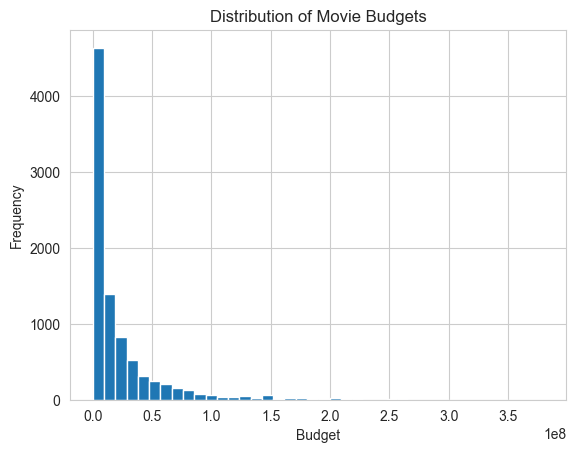

In [99]:
print("Cleaned Budget Stats:\n", budgets_df['budget'].describe())
budgets_df['budget'].hist(bins=40)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

In [100]:
print("ID Type:", ratings_df['movieId'].dtype)
print("Rating Type:", ratings_df['rating'].dtype)
print("Rating Stats:\n", ratings_df['rating'].describe())

ID Type: int64
Rating Type: float64
Rating Stats:
 count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


In [101]:
avgrating_df = ratings_df.groupby('movieId')['rating'].mean().reset_index()
avgrating_df.columns = ['id', 'avg_rating']
avgrating_df

,id,avg_rating
0,1,3.888157
1,2,3.236953
2,3,3.175550
3,4,2.875713
4,5,3.079565
...,...,...
45110,176267,4.000000
45111,176269,3.500000
45112,176271,5.000000
45113,176273,1.000000


In [102]:
merged_df = budgets_df.merge(avgrating_df, on='id', how='inner')
merged_df = merged_df.dropna().reset_index(drop=True)
merged_df

,id,budget,avg_rating
0,5,4000000.0,3.079565
1,11,11000000.0,3.660591
2,12,94000000.0,2.672179
3,13,55000000.0,3.326442
4,14,15000000.0,3.430807
...,...,...,...
2120,173689,75000.0,1.500000
2121,173865,3120375.0,3.750000
2122,173897,40000000.0,4.000000
2123,174751,25000000.0,2.500000


## Hypothesis Test 1: Is there a correlation between a movie's budget and its average rating?

Pearson correlation coefficient: -0.02035508282807372
P-value: 0.3483122431419324


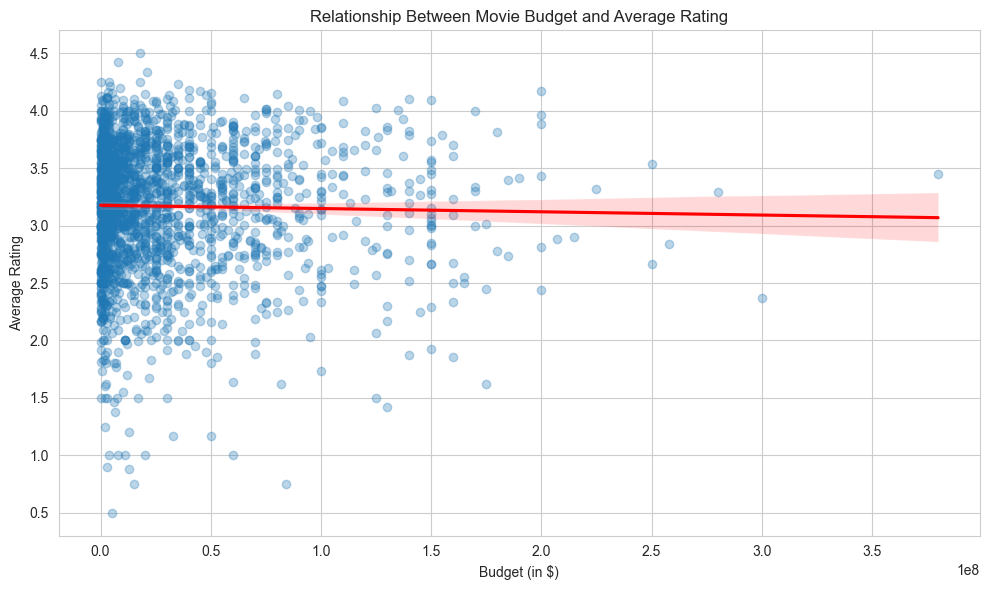

In [103]:
# Calculate Pearson correlation and p-value
corr, p_value = pearsonr(merged_df['budget'], merged_df['avg_rating'])

print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='budget', y='avg_rating', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title('Relationship Between Movie Budget and Average Rating')
plt.xlabel('Budget (in $)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion for Hypothesis Test 1

### Since p = 0.35 > .05, there is little to no correlation between a movie's budget and its average rating. 

# Descriptive Statistics for Budget, Range and Ratings

In [104]:
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [105]:
# Descriptive stats for key numeric columns
movies_df[['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count']].describe()

,budget,revenue,runtime,vote_average,vote_count
count,4.546300e+04,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,1.120935e+07,94.128199,5.618207,109.897338
std,1.742413e+07,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000


In [106]:
# Filter to remove zero or unrealistic values
movies_clean = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)]

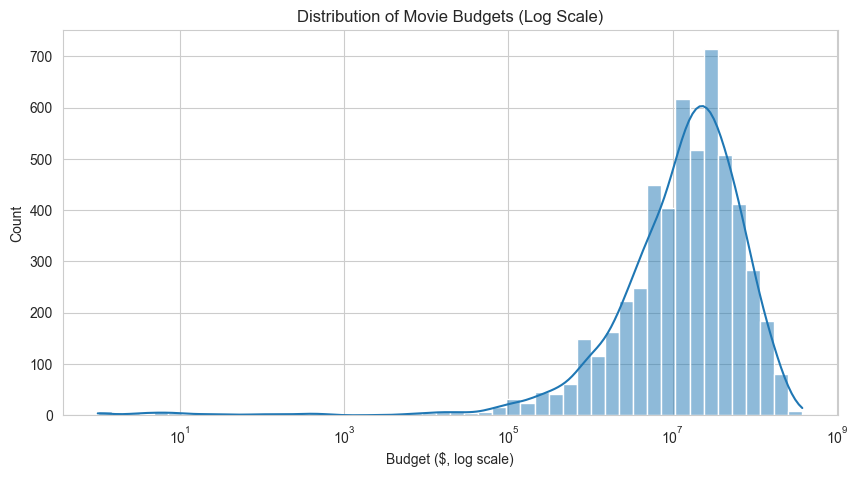

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(movies_clean['budget'], bins=50, kde=True, log_scale=True)
plt.title('Distribution of Movie Budgets (Log Scale)')
plt.xlabel('Budget ($, log scale)')
plt.show()

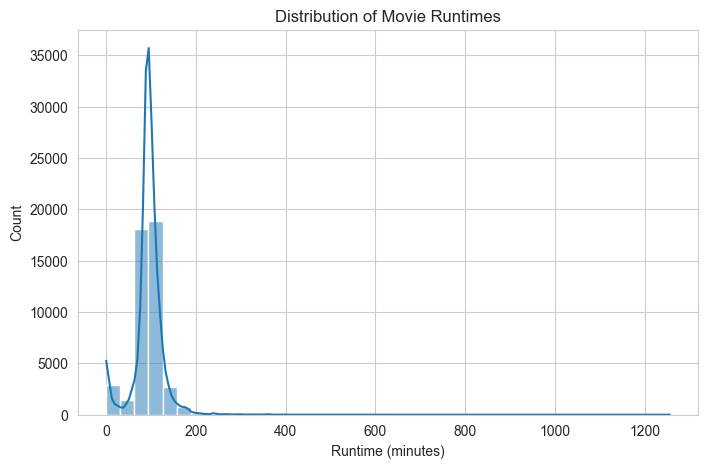

In [108]:
plt.figure(figsize=(8, 5))
sns.histplot(movies_df['runtime'].dropna(), bins=40, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.show()


## Conclusion: Descriptive Statistics

The dataset contains over 45,000 movies, with key numeric features like budget, revenue, runtime, vote average, and vote count. Most movies have a runtime between 85 and 107 minutes, clustering around the 90–100 minute mark. Budgets and revenues are heavily right-skewed, with many zero values and a few extremely high outliers — necessitating the use of a log scale for visualization. The average budget is around $4.2 million, while the average revenue is roughly $11 million, although both have medians of zero, suggesting missing or unreported data for many entries. The vote average typically ranges between 5 and 7, while the number of votes varies widely, indicating differing popularity levels among the movies.

# Data Cleaning for Hypothesis Test 2

#### ANOVA: The second test will be seeing if there is a significant difference between the average rating of different genres of movies. For this we need to get the genre, id, and avg rating for every movie in one df.

In [109]:
print(movies_df.info())
movies_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 45463 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  float64
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  object 
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  revenue

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [110]:
import ast

print(movies_df['genres'].info())
print(movies_df['genres'].head())

# convert the string representation of lists to actual lists
movies_df['genres'] = movies_df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


# extract movie id and the corresponding genres for each movie
movie_genres = []
for index, row in movies_df.iterrows():
    movie_id = row['id']
    for genre in row['genres']:
        # print(genre)
        movie_genres.append({'id': movie_id, 'genre': genre['name']})

# create a DataFrame from the list of dictionaries of movie genres
movie_genre_df = pd.DataFrame(movie_genres)
# display the first few rows of the DataFrame
movie_genre_df

<class 'pandas.core.series.Series'>
Index: 45463 entries, 0 to 45465
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
45463 non-null  object
dtypes: object(1)
memory usage: 710.4+ KB
None
0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object


,id,genre
0,862,Animation
1,862,Comedy
2,862,Family
3,8844,Adventure
4,8844,Fantasy
...,...,...
91089,439050,Family
91090,111109,Drama
91091,67758,Action
91092,67758,Drama


In [111]:
avgrating_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45115 entries, 0 to 45114
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          45115 non-null  int64  
 1   avg_rating  45115 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 705.1 KB


## Hypothesis Test 2: Is there a correlation between movie genre and average rating?


### H0: There is no significant difference in movie ratings across genres
### HA: There is a significant difference in movie ratings across genres.

ANOVA F-statistic: 0.9378028944035437
ANOVA p-value: 0.534638223731938


/var/folders/qk/32gcb2693kb2vvhwyf7jmtn40000gn/T/ipykernel_81805/3400746446.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='genre', y='avg_rating', palette="Set2")


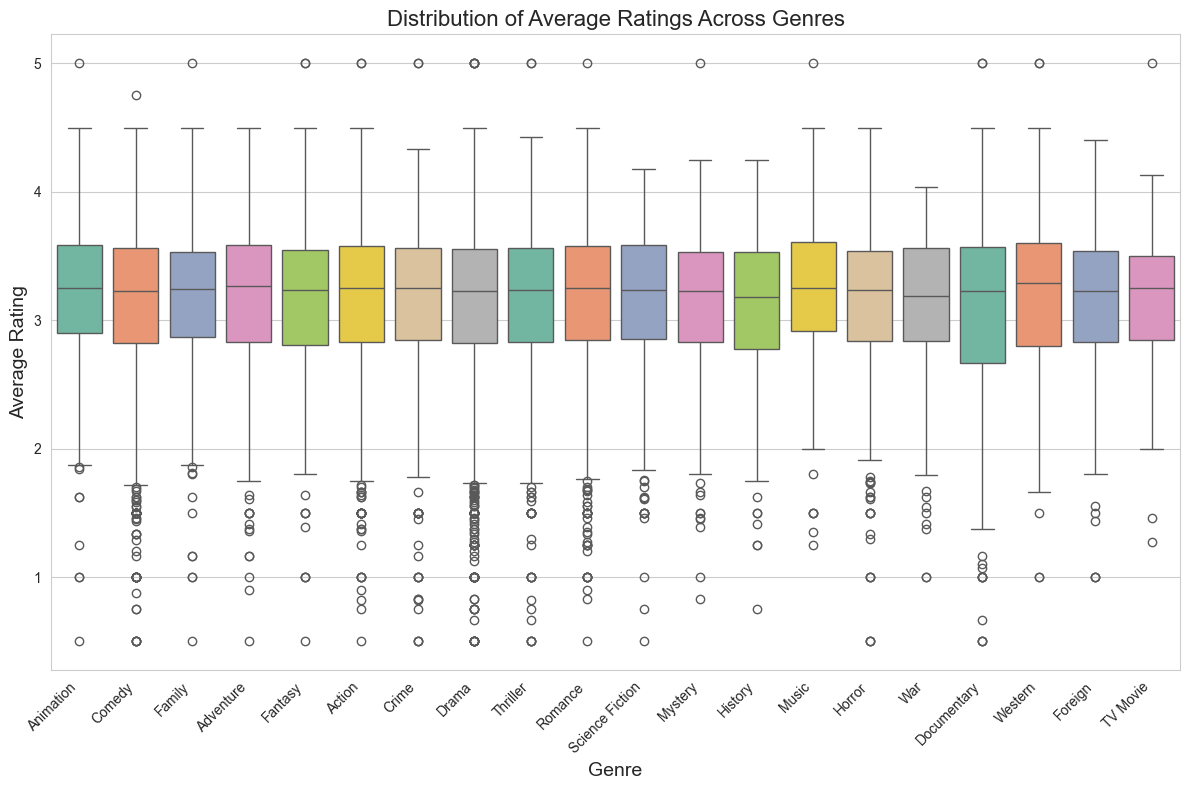

In [112]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# merge the movie_genre_df with the avgrating_df on Movie_ID
merged_df = pd.merge(movie_genre_df, avgrating_df, on='id', how='inner')
# merged_df

# group by 'Genre' and aggregate ratings into separate lists for each genre
ratings_by_genre = [merged_df[merged_df['genre'] == genre]['avg_rating'] for genre in merged_df['genre'].unique()]
# ratings_by_genre 

# calculate the ANOVA F-statistic and p-value
f_stat, p_value = stats.f_oneway(*ratings_by_genre)

print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_value}")

# create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df, x='genre', y='avg_rating', palette="Set2")

plt.title('Distribution of Average Ratings Across Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Conclusion for Hypothesis Test 2:

#### Since p = 0.535 > 0.05, we fail to reject the null hypothesis, and there is not a significant difference in movie ratings across genres. This means that specific genres dont necessarily indicate higher ratings, as can be seen in the box plot of ratings based on genres above.

# Data Clearning for Hypothesis Test 3

#### Independent Samples T‑Test: This checks whether there is a statistically significant difference in average rating for short runtime movies versus long runtime movies.

In [113]:
runtimes_df = movies_df[['id', 'runtime']].reset_index(drop=True)
runtimes_df = runtimes_df.dropna().reset_index(drop=True)
print(runtimes_df['id'].dtype)
print(runtimes_df['runtime'].dtype)
runtimes_df

int64
float64


,id,runtime
0,862,81.0
1,8844,104.0
2,15602,101.0
3,31357,127.0
4,11862,106.0
...,...,...
45198,439050,90.0
45199,111109,360.0
45200,67758,90.0
45201,227506,87.0


In [114]:
avgrating_df

,id,avg_rating
0,1,3.888157
1,2,3.236953
2,3,3.175550
3,4,2.875713
4,5,3.079565
...,...,...
45110,176267,4.000000
45111,176269,3.500000
45112,176271,5.000000
45113,176273,1.000000


In [115]:
merged_runtime_rating_df = runtimes_df.merge(avgrating_df, on='id', how='inner')
merged_runtime_rating_df = merged_runtime_rating_df.dropna().reset_index(drop=True)
merged_runtime_rating_df


,id,runtime,avg_rating
0,862,81.0,3.598930
1,8844,104.0,3.760163
2,949,170.0,3.905544
3,710,130.0,2.740334
4,1408,119.0,3.710181
...,...,...,...
7545,98604,91.0,3.795053
7546,5589,73.0,3.126140
7547,45527,92.0,2.791667
7548,49280,1.0,3.390625


In [116]:
median_runtime = merged_runtime_rating_df['runtime'].median()
print("Median runtime:", median_runtime)

Median runtime: 97.0


In [117]:
#create a new column to categorize movies as "short" or "long"
merged_runtime_rating_df['runtime_category'] = np.where(merged_runtime_rating_df['runtime'] <= median_runtime, 'short', 'long')
#split avg_rating into two groups based on runtime_category
short_ratings = merged_runtime_rating_df.loc[merged_runtime_rating_df['runtime_category'] == 'short', 'avg_rating']
long_ratings = merged_runtime_rating_df.loc[merged_runtime_rating_df['runtime_category'] == 'long', 'avg_rating']

## Hypothesis Test 3: Is there a statistically significant difference in average rating for short runtime movies versus long runtime movies?

### H0: There is no significant difference in average movie ratings for short versus long runtime movies.
### HA: There is a significant difference in average movie ratings for short versus long runtime movies.

In [118]:
t_stat, p_value = stats.ttest_ind(short_ratings, long_ratings, equal_var=False)
print("Welch's t-test results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

Welch's t-test results:
T-statistic: -2.514249130296376
P-value: 0.011949330505462579


/var/folders/qk/32gcb2693kb2vvhwyf7jmtn40000gn/T/ipykernel_81805/1108731645.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='runtime_category', y='avg_rating', data=df_plot, palette="Set2")


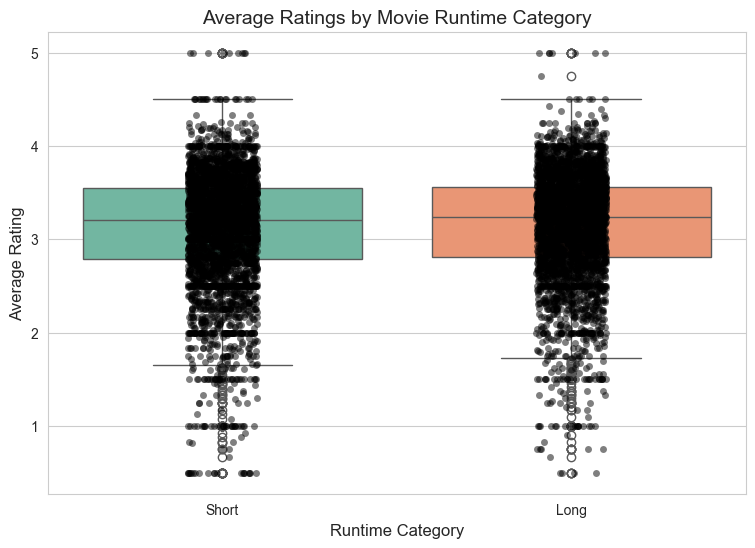

In [119]:
df_plot = merged_runtime_rating_df.copy()
#drop rows where runtime or avg_rating is missing
df_plot.dropna(subset=['runtime', 'avg_rating'], inplace=True)
#calculate the median runtime and categorize movies
median_runtime = df_plot['runtime'].median()
df_plot['runtime_category'] = np.where(df_plot['runtime'] <= median_runtime, 'Short', 'Long')
#set a style for Seaborn
sns.set_style("whitegrid")
#create the figure
plt.figure(figsize=(9, 6))
#draw a boxplot
sns.boxplot(x='runtime_category', y='avg_rating', data=df_plot, palette="Set2")
#overlay the raw data points (stripplot) to show the distribution more clearly
sns.stripplot(x='runtime_category', y='avg_rating', data=df_plot, color='black', alpha=0.5)
#add title and labels
plt.title("Average Ratings by Movie Runtime Category", fontsize=14)
plt.xlabel("Runtime Category", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.show()

## Conclusion for Hypothesis Test 3:

### Since p = 0.012 < .05, we fail to reject the null hypothesis. This means that there is no statistically significant difference in average ratings for short runtime movies versus long runtime movies.